<a href="https://colab.research.google.com/github/talbalelty/Reflection-Removal/blob/main/Moving_Reflection_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kora

In [ ]:
import gc
import cv2
import numpy as np
import statistics
import queue
import matplotlib.pyplot as plt
import time
import itertools
from threading import Thread, current_thread
from IPython.display import HTML
from base64 import b64encode
from google.colab import drive
from kora.drive import upload_public

gc.collect()
drive.mount('/content/drive')
path_to_video = "/content/drive/MyDrive/project images/הזזת השתקפות אצל בן.mp4"
path_to_video_save = "/content/drive/MyDrive/project images/separated video.avi"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download video

In [ ]:
def process_video_separation(video, extraction_method):
  ret = True
  separated_frame_index = 0
  window_size = 10
  separated_video = dict()
  window = list()
  fps = round(video.get(cv2.CAP_PROP_FPS))
  skip_frames = fps // window_size
  for i in range(fps):
    ret, frame = video.read()
    if ret:
      if i % skip_frames == 0:
        window.append(frame / 255.)
    else:
      return null
  
  extraction_method(separated_frame_index, separated_video, window)
  separated_frame_index += 1
  
  plt.imshow(separated_video[0])
  plt.show()
  i = fps
  #  and separated_frame_index < 20
  while (ret):
    ret, frame = video.read()
    if i % skip_frames == 0:
      window = window[1:]
      if frame is not None:
        window.append(frame / 255.)
        extraction_method(separated_frame_index, separated_video, window)
        separated_frame_index += 1
    
    i +=1

  return list(dict(sorted(separated_video.items())).values())  

In [ ]:
def extract_transmission_layer(frame_number, separated_video, window):
  window = np.array(window)
  h, w, c = window[0].shape
  separated_image = np.zeros(window[0].shape)
  separated_image = np.median(window, axis=0)
  separated_video[frame_number] = separated_image

In [ ]:
def extract_reflection_layer(frame_number, separated_video, window):
  threshold = 5
  window = np.array(window)
  h, w, c = window[0].shape
  separated_image = np.zeros(window[0].shape)
  # print(np.mean(window, axis=0).shape)
  # mask = window < (np.mean(window, axis=0) - threshold*np.std(window, axis=0)).any() or \
  #  (np.mean(window, axis=0) + threshold*np.std(window, axis=0)).any() < window
  # print(mask.shape)

  mean = np.mean(window, axis=0)
  std = threshold * np.std(window, axis=0)
 
  mask = (window < mean - std) | (mean + std < window)
  separated_image = np.ma.masked_array(window, mask=mask, fill_value=0).max(axis=0)

  separated_video[frame_number] = separated_image

In [ ]:
# def median_RGB(pixels):
#   r_median = statistics.median(pixels[:,0])
#   g_median = statistics.median(pixels[:,1])
#   b_median = statistics.median(pixels[:,2])

#   return (r_median, g_median, b_median)

In [ ]:
def save_video(video):
  h, w, _ = video[0].shape
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter(path_to_video_save, fourcc, 10.0, (w, h))

  for i in range(len(video)):
    out.write((video[i] * 255).astype(np.uint8))

  out.release()
  cv2.destroyAllWindows()
  print("Video made successfully")

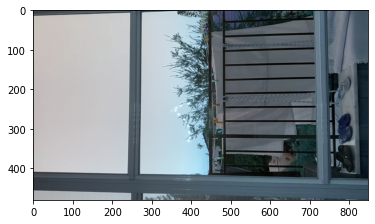

KeyboardInterrupt: ignored

In [ ]:
video = cv2.VideoCapture(path_to_video)
t1 = time.perf_counter()
reflection_video = process_video_separation(video, extract_reflection_layer)
t2 = time.perf_counter()
print(t2-t1)
# show_video(separated_video)

In [ ]:
save_video(reflection_video)

In [ ]:
# video = cv2.VideoCapture(path_to_video)
# t1 = time.perf_counter()
# transmission_video = process_video_separation(video, extract_transmission_layer)
# t2 = time.perf_counter()
# print(t2-t1)
# # show_video(separated_video)

In [ ]:
# plt.imshow(separated_video[0])

In [ ]:
# print(np.array(separated_video).shape)
# save_video(transmission_video)

In [ ]:
  # url = upload_public(path_to_video)
  # # then display it
  # HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
  # url = upload_public(path_to_video_save)
  # # then display it
  # HTML(f"""<video src={url} width=500 controls/>""")